# Importing Libraries

In [1212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, pearsonr, spearmanr, chi2_contingency, f_oneway, kruskal 

# 1: Data Preparation

### Step 1: Loading the dataset

In [953]:
df = pd.read_csv(r'C:\Users\Junaid\Desktop\SDA\habits.data', sep=';', na_values=['?'], index_col=False, header=0)

In [955]:
df

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,V1,V5,V7,V21,...,V40,V68,V69,V70,V75,H1a_A,H1b_A,H1g_A,H1h_A,H1i_A
0,50007,2,2,2,3.0,6,580,0,20,0,...,0,30,0,0,0,1.0,1.0,2.0,1.0,2.0
1,50009,1,1,2,1.0,7,0,40,0,0,...,0,240,0,60,0,1.0,1.0,2.0,1.0,1.0
2,50015,1,1,1,3.0,8,0,10,0,0,...,0,310,10,240,0,2.0,1.0,2.0,1.0,2.0
3,50032,2,1,1,2.0,8,0,0,10,0,...,0,0,0,170,0,2.0,2.0,2.0,2.0,2.0
4,50033,1,1,2,1.0,8,00:00,02:10,00:20,00:00,...,00:00,00:30,00:00,01:50,00:00,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,2,2,1.0,4,440,30,10,0,...,0,10,0,80,0,1.0,1.0,1.0,2.0,1.0
389,51947,2,1,2,1.0,7,490,0,10,0,...,0,0,0,70,10,1.0,1.0,2.0,1.0,2.0
390,51956,1,1,2,2.0,6,0,30,0,0,...,0,30,0,170,50,1.0,1.0,2.0,1.0,2.0
391,51957,2,2,2,1.0,7,0,10,10,0,...,0,60,0,30,40,2.0,2.0,1.0,1.0,2.0


### Step 2: Selecting the relevant columns
<div style="color: red;">

In [957]:
columns_to_use = ['kohde', 'jasen', 'pvknro', 'sp', 'IKAL1', 'ASALUE', 'V1', 'V22', 'V32', 'V75', 'H1b_A', 'H1i_A']
final_df = df[columns_to_use]

In [959]:
final_df

,kohde,jasen,pvknro,sp,IKAL1,ASALUE,V1,V22,V32,V75,H1b_A,H1i_A
0,50007,2,2,2,6,3.0,580,0,430,0,1.0,2.0
1,50009,1,1,2,7,1.0,0,0,560,0,1.0,1.0
2,50015,1,1,1,8,3.0,0,0,450,0,1.0,2.0
3,50032,2,1,1,8,2.0,0,0,530,0,2.0,2.0
4,50033,1,1,2,8,1.0,00:00,00:00,07:20,00:00,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,2,2,4,1.0,440,0,460,0,1.0,1.0
389,51947,2,1,2,7,1.0,490,0,470,10,1.0,2.0
390,51956,1,1,2,6,2.0,0,0,NaN,50,1.0,2.0
391,51957,2,2,2,7,1.0,0,0,740,40,2.0,2.0


### Step 3: Creating a copy of the dataframe to work on (to avoid modifying the original)

In [961]:
final_df = final_df.copy()

### Step 4: Renaming columns for better readability

In [963]:
final_df.rename(columns={
    'kohde': 'Household_ID',
    'jasen': 'Member_ID',
    'pvknro': 'Day_of_Week',
    'sp': 'Sex',
    'IKAL1': 'Age_Group',
    'ASALUE': 'Living_Environment',
    'V1': 'Working',
    'V22': 'Reading_and_Playing_with_Children',
    'V32': 'Sleeping',
    'V75': 'Phonecall',
    'H1b_A': 'Theater',
    'H1i_A': 'Sport_Event',
}, inplace=True)

In [965]:
final_df

,Household_ID,Member_ID,Day_of_Week,Sex,Age_Group,Living_Environment,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall,Theater,Sport_Event
0,50007,2,2,2,6,3.0,580,0,430,0,1.0,2.0
1,50009,1,1,2,7,1.0,0,0,560,0,1.0,1.0
2,50015,1,1,1,8,3.0,0,0,450,0,1.0,2.0
3,50032,2,1,1,8,2.0,0,0,530,0,2.0,2.0
4,50033,1,1,2,8,1.0,00:00,00:00,07:20,00:00,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,2,2,4,1.0,440,0,460,0,1.0,1.0
389,51947,2,1,2,7,1.0,490,0,470,10,1.0,2.0
390,51956,1,1,2,6,2.0,0,0,NaN,50,1.0,2.0
391,51957,2,2,2,7,1.0,0,0,740,40,2.0,2.0


### Step 5: Checking the initial data types to understand what needs to be changed


In [967]:
print(final_df.dtypes)

Household_ID                           int64
Member_ID                              int64
Day_of_Week                            int64
Sex                                    int64
Age_Group                              int64
Living_Environment                   float64
Working                               object
Reading_and_Playing_with_Children     object
Sleeping                              object
Phonecall                             object
Theater                              float64
Sport_Event                          float64
dtype: object


### Step 6: Converting columns to categorical where appropriate

In [969]:
final_df['Day_of_Week'] = pd.Categorical(final_df['Day_of_Week']).rename_categories({1: 'Working Day', 2: 'Weekend'})

final_df['Living_Environment'] = pd.Categorical(final_df['Living_Environment']).rename_categories({1: 'City', 2: 'Municipality', 3: 'Rural Area'})

final_df['Sex'] = pd.Categorical(final_df['Sex']).rename_categories({1: 'Male', 2: 'Female'})

final_df['Theater'] = pd.Categorical(final_df['Theater']).rename_categories({1: 'Yes', 2: 'No'})

final_df['Sport_Event'] = pd.Categorical(final_df['Sport_Event']).rename_categories({1: 'Yes', 2: 'No'})

In [971]:
final_df.dtypes

Household_ID                            int64
Member_ID                               int64
Day_of_Week                          category
Sex                                  category
Age_Group                               int64
Living_Environment                   category
Working                                object
Reading_and_Playing_with_Children      object
Sleeping                               object
Phonecall                              object
Theater                              category
Sport_Event                          category
dtype: object

In [973]:
final_df

,Household_ID,Member_ID,Day_of_Week,Sex,Age_Group,Living_Environment,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall,Theater,Sport_Event
0,50007,2,Weekend,Female,6,Rural Area,580,0,430,0,Yes,No
1,50009,1,Working Day,Female,7,City,0,0,560,0,Yes,Yes
2,50015,1,Working Day,Male,8,Rural Area,0,0,450,0,Yes,No
3,50032,2,Working Day,Male,8,Municipality,0,0,530,0,No,No
4,50033,1,Working Day,Female,8,City,00:00,00:00,07:20,00:00,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,Weekend,Female,4,City,440,0,460,0,Yes,Yes
389,51947,2,Working Day,Female,7,City,490,0,470,10,Yes,No
390,51956,1,Working Day,Female,6,Municipality,0,0,NaN,50,Yes,No
391,51957,2,Weekend,Female,7,City,0,0,740,40,No,No


### Step 7: Handling missing values

In [975]:
print(final_df.isnull().sum())

Household_ID                          0
Member_ID                             0
Day_of_Week                           0
Sex                                   0
Age_Group                             0
Living_Environment                    1
Working                               2
Reading_and_Playing_with_Children     2
Sleeping                              5
Phonecall                             7
Theater                              26
Sport_Event                          25
dtype: int64


### Step 8: Imputing categorical columns with the mode (most frequent value)

In [977]:
final_df['Living_Environment'] = final_df['Living_Environment'].fillna(final_df['Living_Environment'].mode()[0])

final_df['Working'] = final_df['Working'].fillna(final_df['Working'].mode()[0])

final_df['Reading_and_Playing_with_Children'] = final_df['Reading_and_Playing_with_Children'].fillna(final_df['Reading_and_Playing_with_Children'].mode()[0])

final_df['Sleeping'] = final_df['Sleeping'].fillna(final_df['Sleeping'].mode()[0])

final_df['Phonecall'] = final_df['Phonecall'].fillna(final_df['Phonecall'].mode()[0])

final_df['Theater'] = final_df['Theater'].fillna(final_df['Theater'].mode()[0])

final_df['Sport_Event'] = final_df['Sport_Event'].fillna(final_df['Sport_Event'].mode()[0])

### Step 9: Verifying if missing values are handled or not

In [979]:
print(final_df.isnull().sum())

Household_ID                         0
Member_ID                            0
Day_of_Week                          0
Sex                                  0
Age_Group                            0
Living_Environment                   0
Working                              0
Reading_and_Playing_with_Children    0
Sleeping                             0
Phonecall                            0
Theater                              0
Sport_Event                          0
dtype: int64


In [981]:
final_df

,Household_ID,Member_ID,Day_of_Week,Sex,Age_Group,Living_Environment,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall,Theater,Sport_Event
0,50007,2,Weekend,Female,6,Rural Area,580,0,430,0,Yes,No
1,50009,1,Working Day,Female,7,City,0,0,560,0,Yes,Yes
2,50015,1,Working Day,Male,8,Rural Area,0,0,450,0,Yes,No
3,50032,2,Working Day,Male,8,Municipality,0,0,530,0,No,No
4,50033,1,Working Day,Female,8,City,00:00,00:00,07:20,00:00,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,Weekend,Female,4,City,440,0,460,0,Yes,Yes
389,51947,2,Working Day,Female,7,City,490,0,470,10,Yes,No
390,51956,1,Working Day,Female,6,Municipality,0,0,480,50,Yes,No
391,51957,2,Weekend,Female,7,City,0,0,740,40,No,No


###### To handle missing or invalid values in the `Working`, `Reading_and_Playing_with_Children`, `Sleeping`, and `Phonecall` columns, I implemented a function that converts time from `hh:mm` format to total minutes. If the time value is missing, incorrectly formatted, or contains non-numeric values, it is replaced with `0` minutes. This is done under the assumption that if no valid time is provided, the activity did not occur, ensuring consistency in the dataset and enabling accurate analysis without errors from invalid data entries.

In [984]:
# Function to convert 'hh:mm' to total minutes
def convert_to_minutes(time_str):
    if isinstance(time_str, str) and ':' in time_str:
        hours, minutes = map(int, time_str.split(':'))
        return hours * 60 + minutes
    return 0  # Return 0 if the value is invalid or NaN

# Apply the function to relevant columns
final_df['Working'] = final_df['Working'].apply(convert_to_minutes)
final_df['Reading_and_Playing_with_Children'] = final_df['Reading_and_Playing_with_Children'].apply(convert_to_minutes)
final_df['Sleeping'] = final_df['Sleeping'].apply(convert_to_minutes)
final_df['Phonecall'] = final_df['Phonecall'].apply(convert_to_minutes)

In [986]:
final_df.dtypes

Household_ID                            int64
Member_ID                               int64
Day_of_Week                          category
Sex                                  category
Age_Group                               int64
Living_Environment                   category
Working                                 int64
Reading_and_Playing_with_Children       int64
Sleeping                                int64
Phonecall                               int64
Theater                              category
Sport_Event                          category
dtype: object

In [988]:
final_df

,Household_ID,Member_ID,Day_of_Week,Sex,Age_Group,Living_Environment,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall,Theater,Sport_Event
0,50007,2,Weekend,Female,6,Rural Area,0,0,0,0,Yes,No
1,50009,1,Working Day,Female,7,City,0,0,0,0,Yes,Yes
2,50015,1,Working Day,Male,8,Rural Area,0,0,0,0,Yes,No
3,50032,2,Working Day,Male,8,Municipality,0,0,0,0,No,No
4,50033,1,Working Day,Female,8,City,0,0,440,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,Weekend,Female,4,City,0,0,0,0,Yes,Yes
389,51947,2,Working Day,Female,7,City,0,0,0,0,Yes,No
390,51956,1,Working Day,Female,6,Municipality,0,0,0,0,Yes,No
391,51957,2,Weekend,Female,7,City,0,0,0,0,No,No


In [990]:
# Step 10: Remove duplicates
# It's a good practice to check and remove any duplicate rows in the dataset
final_df.drop_duplicates(inplace=True)

In [992]:
# Step 11: Check for outliers in numeric columns
# Get summary statistics to detect any extreme values in numeric columns
print(final_df.describe())

       Household_ID   Member_ID   Age_Group     Working  \
count    393.000000  393.000000  393.000000  393.000000   
mean   50967.325700    1.407125    6.221374   14.961832   
std      557.423698    0.491925    1.551612   81.394486   
min    50007.000000    1.000000    3.000000    0.000000   
25%    50482.000000    1.000000    5.000000    0.000000   
50%    50969.000000    1.000000    6.000000    0.000000   
75%    51456.000000    2.000000    7.000000    0.000000   
max    51964.000000    2.000000    9.000000  600.000000   

       Reading_and_Playing_with_Children    Sleeping   Phonecall  
count                         393.000000  393.000000  393.000000  
mean                            0.127226   63.867684    0.814249  
std                             1.816617  173.208918    5.330754  
min                             0.000000    0.000000    0.000000  
25%                             0.000000    0.000000    0.000000  
50%                             0.000000    0.000000    0.000000  

In [997]:
sns.set(style="whitegrid")

### Step 10: Histograms for continuous variables (e.g., Working, Reading_and_Playing_with_Children, Sleeping, Phonecall)

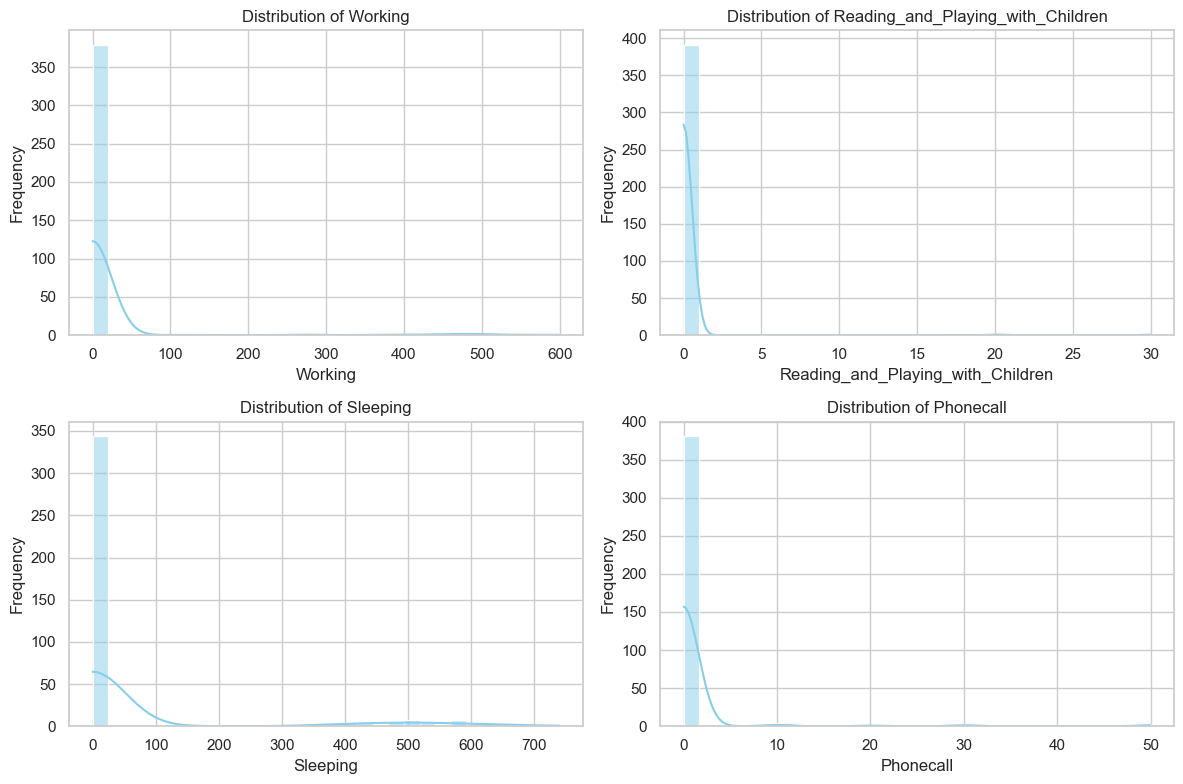

In [999]:
continuous_columns = ['Working', 'Reading_and_Playing_with_Children', 'Sleeping', 'Phonecall']

# Create subplots for histograms
plt.figure(figsize=(12, 8))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(final_df[column], kde=True, color="skyblue", bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Step 11:  Creating boxplot for continuous variables (e.g., Working, Reading_and_Playing_with_Children, Sleeping, Phonecall)

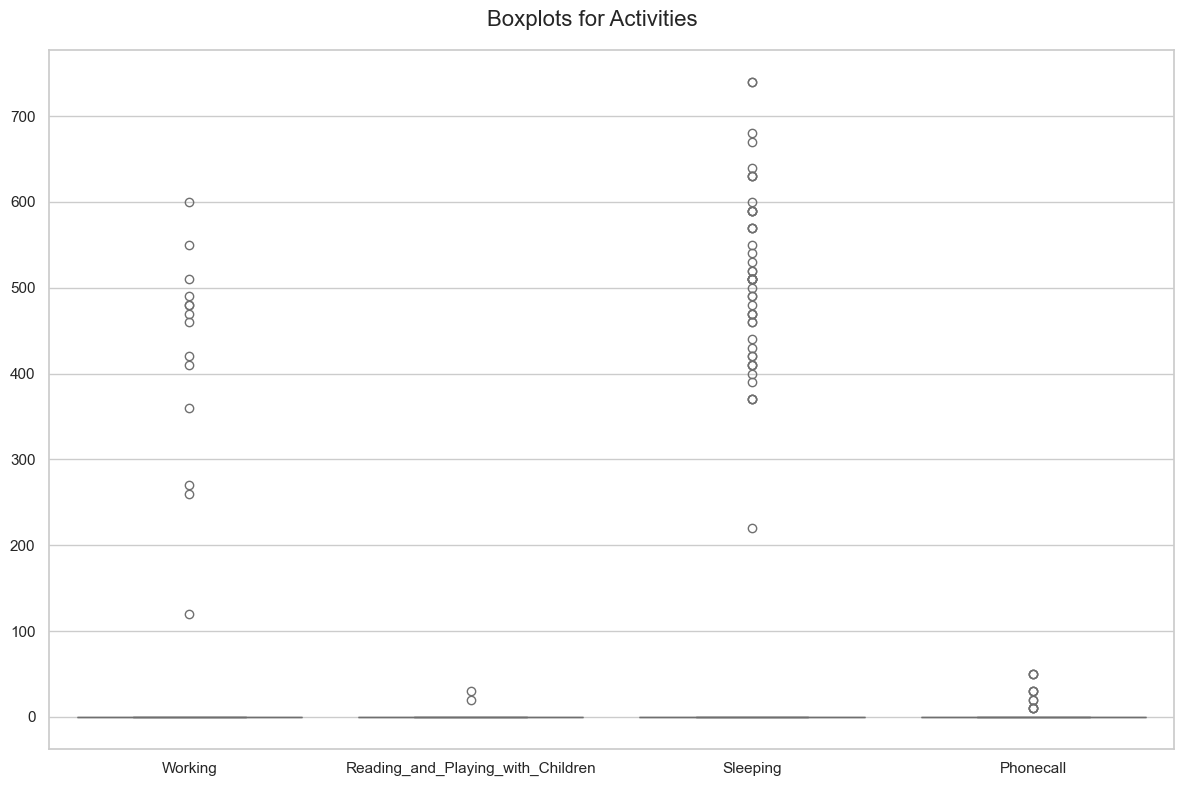

In [1071]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=final_df[continuous_columns], palette='pastel')
plt.suptitle("Boxplots for Activities", fontsize=16)
plt.tight_layout()
plt.show()

### Step 12. Bar charts for categorical variables (Day_of_Week, Sex, Age_Group, Living_Environment, Theater, Sport_Event)

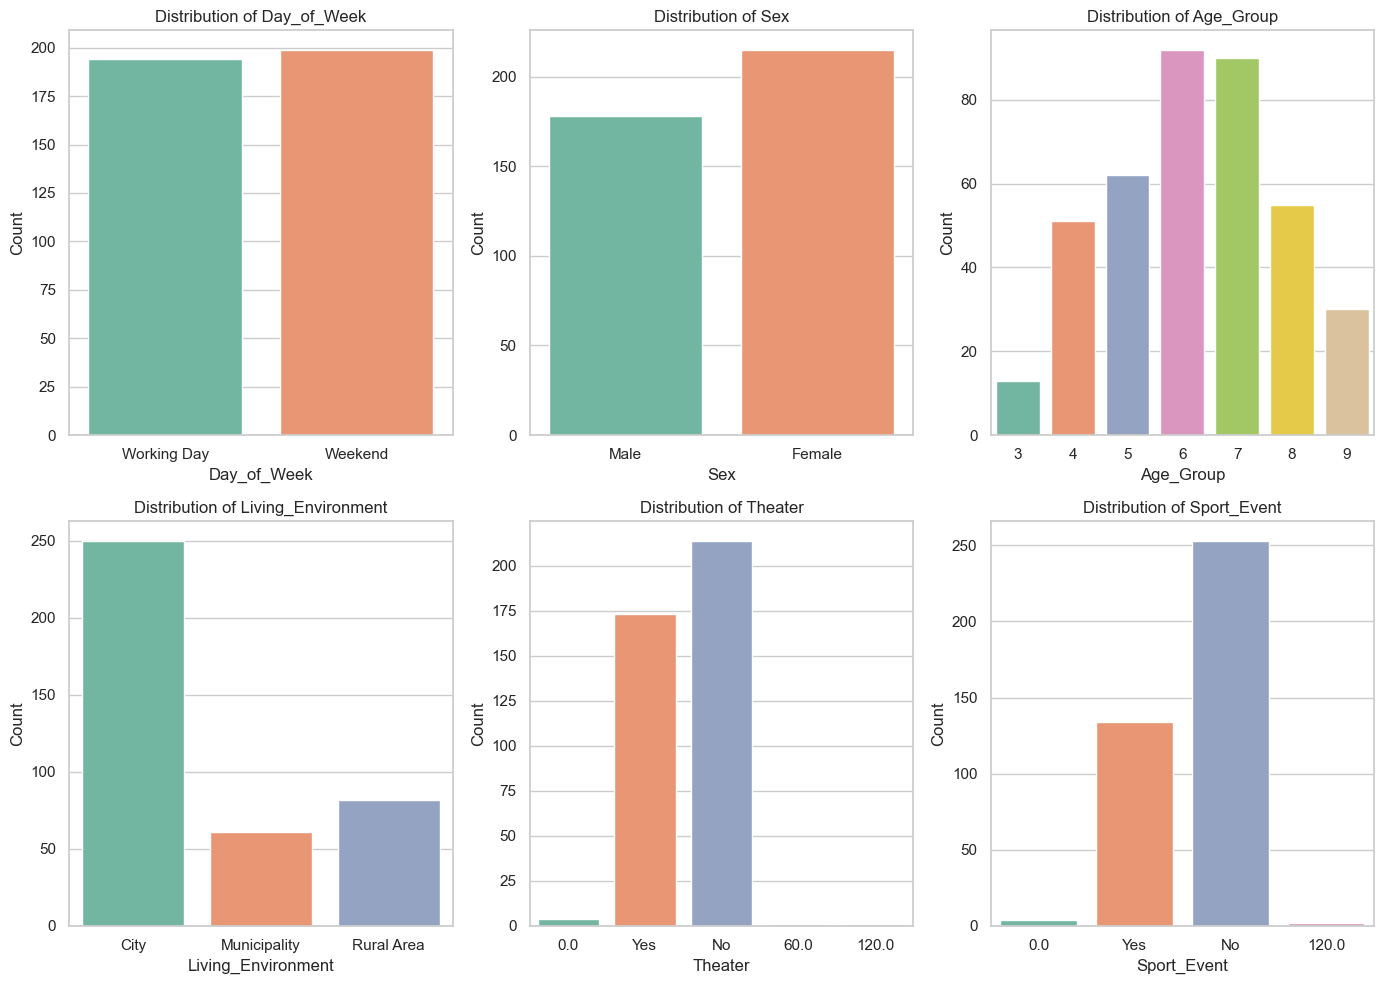

In [1003]:
categorical_columns = ['Day_of_Week', 'Sex', 'Age_Group', 'Living_Environment', 'Theater', 'Sport_Event']

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=final_df[column], hue=final_df[column], palette="Set2", legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<div style="color: red;">
In the above box plot, we can observe that the 'Theater' and 'Sport_Event' columns contain some outlier values, specifically 0.0, 60.0, and 120.0, which appear as extreme points on the plot. These values stand out from the rest of the data, suggesting that they may not accurately represent meaningful entries. The box plot visually highlights these anomalies, indicating that they likely result from data entry errors or other inconsistencies, which could affect the overall analysis and interpretation of these variables.

### Step 13: Droping rows with invalid numerical values in 'Theater' and 'Sport_Event' (0.0, 60.0, 120.0) & (0.0,120.0)

In [ ]:
final_df = final_df[~final_df['Theater'].isin([0.0, 60.0, 120.0])]
final_df = final_df[~final_df['Sport_Event'].isin([0.0, 120.0])]

### Step 14: Removing invalid categories of 'Theater' and 'Sport_Event'

In [1086]:
final_df['Theater'] = final_df['Theater'].cat.remove_categories([0.0, 60.0, 120.0])
final_df['Sport_Event'] = final_df['Sport_Event'].cat.remove_categories([0.0, 120.0])

ValueError: removals must all be in old categories: {0.0, 60.0, 120.0}

### Step 15: Checking unique values after dropping invalid categories

In [1017]:
print(final_df['Theater'].unique())
print(final_df['Sport_Event'].unique())

['Yes', 'No']
Categories (2, object): ['No', 'Yes']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


<div style="color: red;">
I removed the rows with invalid numerical values in the 'Theater' and 'Sport_Event' columns (specifically 0.0, 60.0, and 120.0) because these values do not seem to represent valid or meaningful information in the context of the dataset. The presence of such values likely indicates data entry errors or anomalies that could distort the analysis and lead to inaccurate conclusions. By excluding these invalid entries, I ensure that the dataset accurately reflects the intended values for these columns and maintain the integrity of the analysis moving forward.

### Step 16: Plotting Bar charts again for categorical variables (Day_of_Week, Sex, Age_Group, Living_Environment, Theater, Sport_Event)

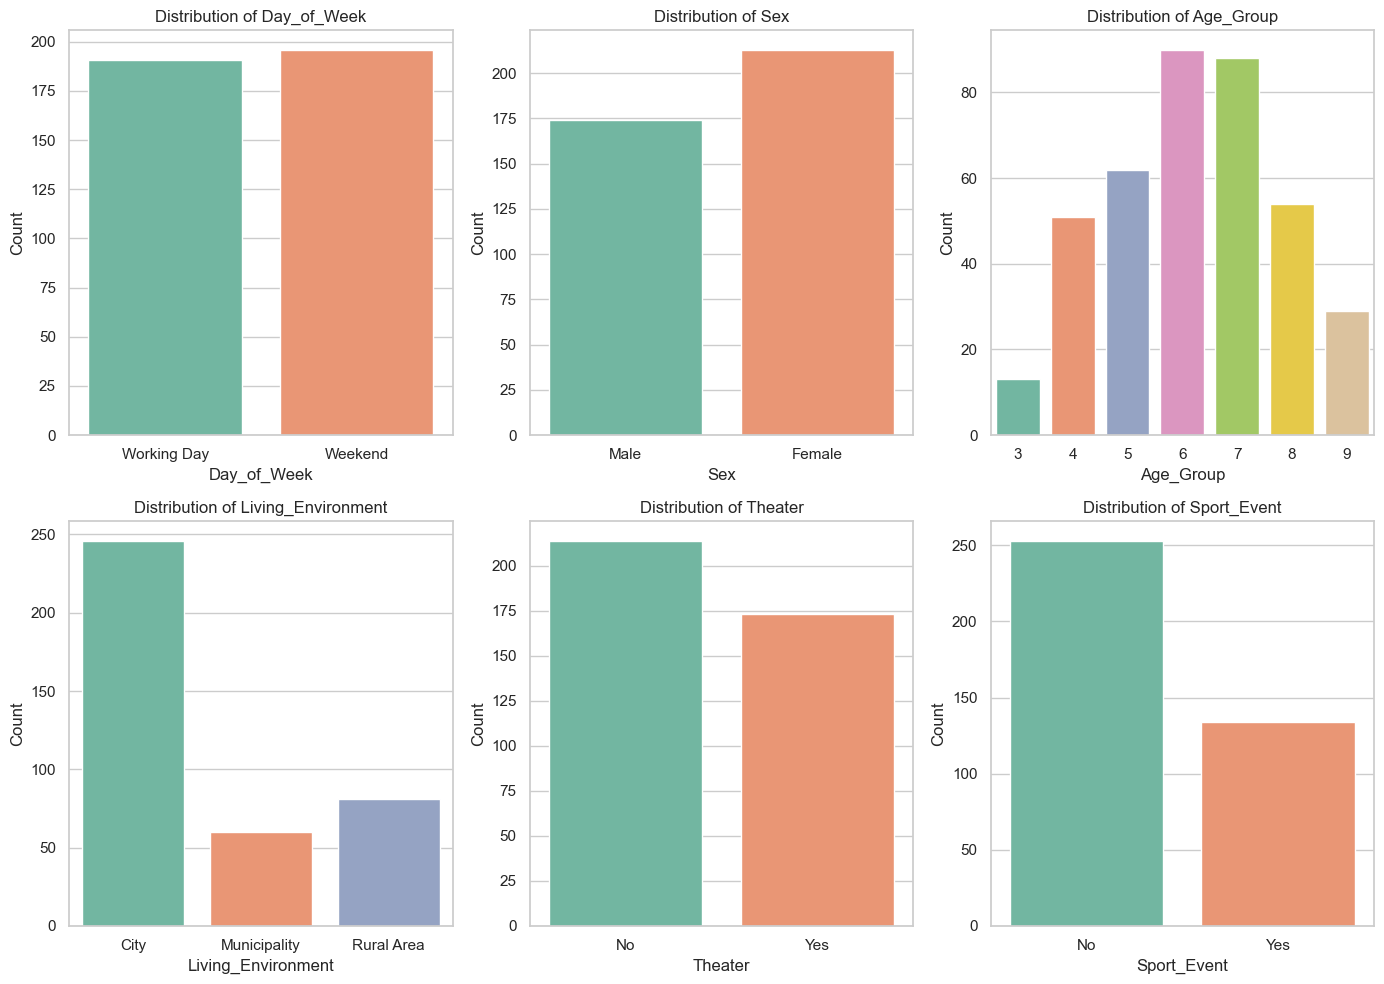

In [1019]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=final_df[column], hue=final_df[column], palette="Set2", legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 2: Use of descriptive statistics	

### Step 1: Selecting only numeric columns

In [1122]:
numeric_columns = final_df.select_dtypes(include=['number']).columns

### Step 2: Descriptive statistics for numeric columns

In [1129]:
final_df[numeric_columns].describe()

,Household_ID,Member_ID,Age_Group,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,50972.082687,1.405685,6.206718,15.193798,0.129199,64.857881,0.826873
std,559.788583,0.491660,1.553421,82.003103,1.830612,174.365372,5.371051
min,50007.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,50480.500000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50975.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,51465.500000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,51964.000000,2.000000,9.000000,600.000000,30.000000,740.000000,50.000000


### Step 3: Calculating skewness for numeric columns

In [1138]:
final_df[numeric_columns].skew()

Household_ID                         -0.002448
Member_ID                             0.385654
Age_Group                            -0.068824
Working                               5.496985
Reading_and_Playing_with_Children    14.644191
Sleeping                              2.443565
Phonecall                             7.532112
dtype: float64

### Step 4: Calculating kurtosis for numeric columns

In [1141]:
final_df[numeric_columns].kurt()

Household_ID                          -1.193841
Member_ID                             -1.860915
Age_Group                             -0.730526
Working                               29.449021
Reading_and_Playing_with_Children    220.043066
Sleeping                               4.358301
Phonecall                             60.248860
dtype: float64

### Step 5: For categorical columns, summarize their distribution

In [1146]:
for col in categorical_columns:
    print(f"Value counts for column {col}:\n", final_df[col].value_counts(), "\n")

Value counts for column Day_of_Week:
 Day_of_Week
Weekend        196
Working Day    191
Name: count, dtype: int64 

Value counts for column Sex:
 Sex
Female    213
Male      174
Name: count, dtype: int64 

Value counts for column Living_Environment:
 Living_Environment
City            246
Rural Area       81
Municipality     60
Name: count, dtype: int64 

Value counts for column Theater:
 Theater
No     214
Yes    173
Name: count, dtype: int64 

Value counts for column Sport_Event:
 Sport_Event
No     253
Yes    134
Name: count, dtype: int64 



# 3: Use of estimation and statistical tests

### Step 1: Estimating Central Tendency and Dispersion

In [1152]:
numerical_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

central_tendency_dispersion = final_df[numerical_columns].agg(['mean', 'median', 'std', 'min', 'max', 'quantile'])
print(central_tendency_dispersion)

          Household_ID  Member_ID  Age_Group     Working  \
mean      50972.082687   1.405685   6.206718   15.193798   
median    50975.000000   1.000000   6.000000    0.000000   
std         559.788583   0.491660   1.553421   82.003103   
min       50007.000000   1.000000   3.000000    0.000000   
max       51964.000000   2.000000   9.000000  600.000000   
quantile  50975.000000   1.000000   6.000000    0.000000   

          Reading_and_Playing_with_Children    Sleeping  Phonecall  
mean                               0.129199   64.857881   0.826873  
median                             0.000000    0.000000   0.000000  
std                                1.830612  174.365372   5.371051  
min                                0.000000    0.000000   0.000000  
max                               30.000000  740.000000  50.000000  
quantile                           0.000000    0.000000   0.000000  


### Step 2: Confidence Intervals (Estimation)

In [1160]:
# 95% confidence interval for 'Working' column
working_data = final_df['Working'].dropna()  # Remove NaN values
mean_working = np.mean(working_data)
std_working = np.std(working_data, ddof=1)
n = len(working_data)

# Standard error of the mean
sem = std_working / np.sqrt(n)

# Confidence interval
confidence_interval = stats.t.interval(0.95, n-1, loc=mean_working, scale=sem)
print("95% Confidence Interval for 'Working' column:", confidence_interval)

95% Confidence Interval for 'Working' column: (6.99808509087562, 23.389511808349187)


### Step 3: Check Normality of Numerical Variables

#### Step 3.1: Descriptive Statistics for Numerical Variables

##### Calculating and displaying the mean, median, and standard deviation for Age_Group.

Descriptive Statistics for Age_Group:
Mean: 6.21, Median: 6.00, Standard Deviation: 1.55

Descriptive Statistics for Age_Group by Living_Environment:
                        mean  median       std
Living_Environment                            
City                6.256098     6.0  1.579028
Municipality        6.150000     6.0  1.482382
Rural Area          6.098765     6.0  1.537896


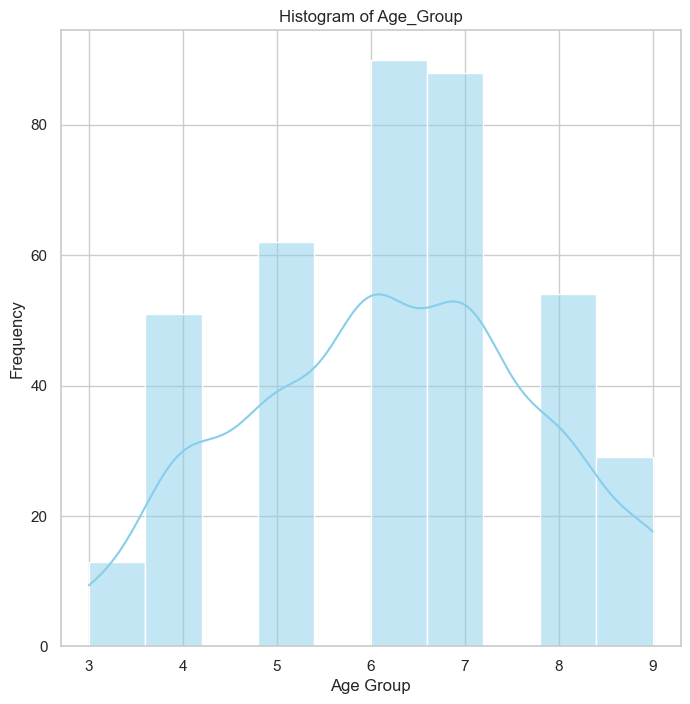

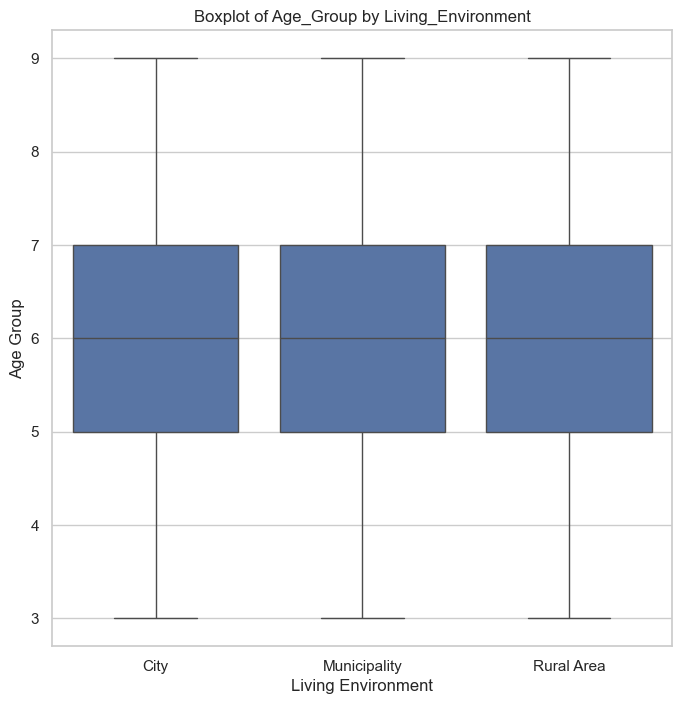

In [1291]:
# Overall Descriptive Statistics for Age_Group
mean_age = final_df['Age_Group'].mean()
median_age = final_df['Age_Group'].median()
std_dev_age = final_df['Age_Group'].std()

print(f"Descriptive Statistics for Age_Group:")
print(f"Mean: {mean_age:.2f}, Median: {median_age:.2f}, Standard Deviation: {std_dev_age:.2f}")

# Descriptive Statistics by Living_Environment
grouped_stats = final_df.groupby('Living_Environment', observed = False)['Age_Group'].agg(['mean', 'median', 'std'])
print("\nDescriptive Statistics for Age_Group by Living_Environment:")
print(grouped_stats)

# Visualize Distribution with a Histogram
plt.figure(figsize=(8, 8))
sns.histplot(final_df['Age_Group'], kde=True, bins=10, color='skyblue')
plt.title('Histogram of Age_Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

# Visualize Grouped Statistics with a Boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(x='Living_Environment', y='Age_Group', data=final_df)
plt.title('Boxplot of Age_Group by Living_Environment')
plt.xlabel('Living Environment')
plt.ylabel('Age Group')
plt.show()

#### Step 3.2: Shapiro-Wilk test for normality on numerical variables 

##### Checking normality of numerical variables and visualize the results with a histogram. 

Shapiro-Wilk Test for Age_Group: stat=0.95, p-value=0.00
Age_Group does NOT follow a normal distribution.


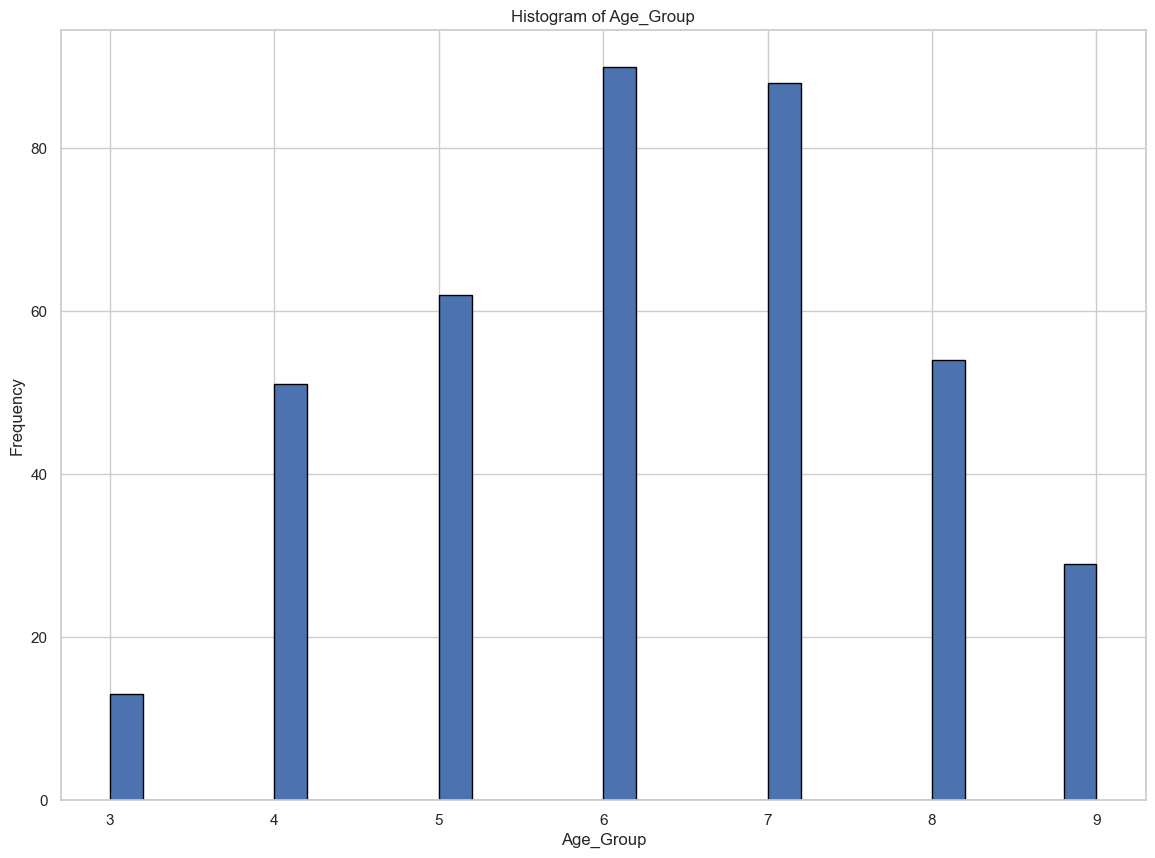

In [1188]:
numerical_columns = ['Age_Group']  

for col in numerical_columns:
    stat, p_value = shapiro(final_df[col].dropna())
    print(f"Shapiro-Wilk Test for {col}: stat={stat:.2f}, p-value={p_value:.2f}")
    if p_value > 0.05:
        print(f"{col} follows a normal distribution.")
    else:
        print(f"{col} does NOT follow a normal distribution.")
    
    # Plotting histogram to visualize distribution
    plt.figure(figsize=(14, 10))
    plt.hist(final_df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Step 3.3: Confidence Interval for the Mean

##### Calculating the confidence interval for Age_Group, and visualizing its distribution.

Confidence Interval for Age_Group: (6.05, 6.36)


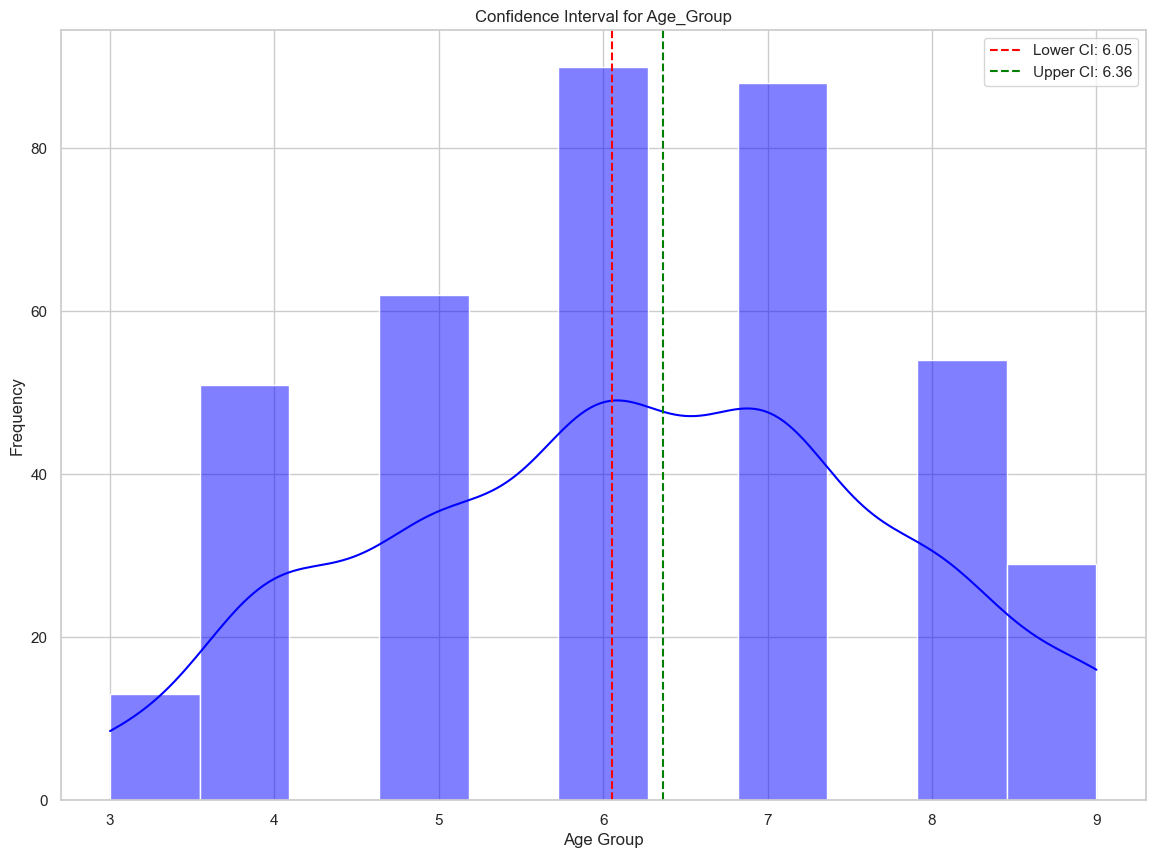

In [1242]:
def confidence_interval(data, confidence=0.95):
    data = data.dropna()
    mean = np.mean(data)
    std_error = stats.sem(data)
    margin_of_error = std_error * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean - margin_of_error, mean + margin_of_error

lower, upper = confidence_interval(final_df['Age_Group'])
print(f"Confidence Interval for Age_Group: ({lower:.2f}, {upper:.2f})")

# Visualize confidence interval with a plot
plt.figure(figsize=(14, 10))
sns.histplot(final_df['Age_Group'].dropna(), kde=True, color='blue')
plt.axvline(x=lower, color='red', linestyle='--', label=f'Lower CI: {lower:.2f}')
plt.axvline(x=upper, color='green', linestyle='--', label=f'Upper CI: {upper:.2f}')
plt.title('Confidence Interval for Age_Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Step 3.4: Chi-Squared Test for Categorical Variables

##### Perform Chi-squared test between Sex and Sport_Event and visualizing the contingency table.

Chi-squared Test: Chi2 stat=12.18, p-value=0.00
There is a significant association between 'Sex' and 'Sport_Event'.


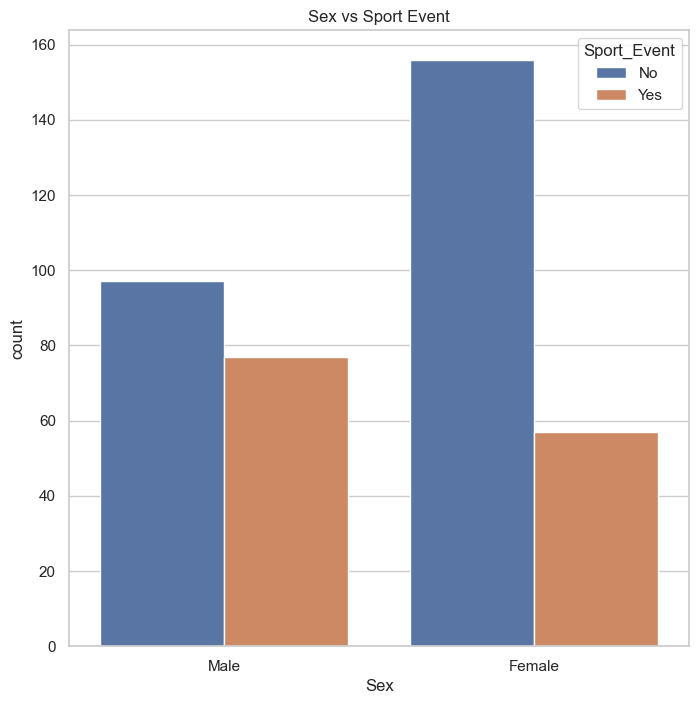

In [1266]:
contingency_table = pd.crosstab(final_df['Sex'], final_df['Sport_Event'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Test: Chi2 stat={chi2_stat:.2f}, p-value={p_value:.2f}")

if p_value < 0.05:
    print("There is a significant association between 'Sex' and 'Sport_Event'.")
else:
    print("There is no significant association between 'Sex' and 'Sport_Event'.")

plt.figure(figsize=(8, 8))
sns.countplot(x='Sex', hue='Sport_Event', data=final_df)
plt.title('Sex vs Sport Event')
plt.show()

##### Performing Chi-squared test between Living_Evironment and  and visualizing the contingency table.

Chi-squared Test: Chi2 stat=2.10, p-value=0.35
There is no significant association between 'Living_Environment' and 'Theater'.


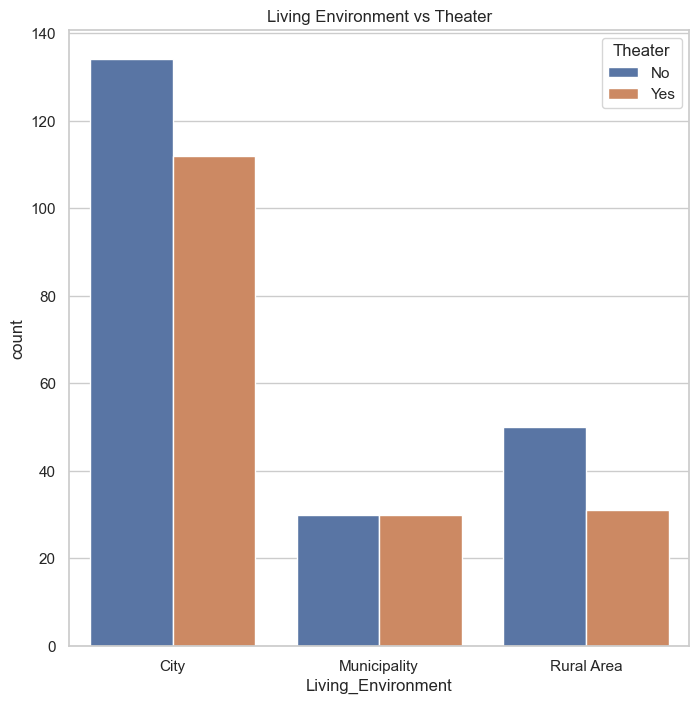

In [1272]:
# Chi-squared test between 'Living_Evironment' vs 'Theater'
contingency_table = pd.crosstab(final_df['Living_Environment'], final_df['Theater'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Test: Chi2 stat={chi2_stat:.2f}, p-value={p_value:.2f}")

if p_value < 0.05:
    print("There is a significant association between 'Living_Environment' and 'Theater'.")
else:
    print("There is no significant association between 'Living_Environment' and 'Theater'.")

# Visualize the contingency table using a heatmap
plt.figure(figsize=(8, 8))
sns.countplot(x='Living_Environment', hue='Theater', data=final_df)
plt.title('Living Environment vs Theater')
plt.show()

#### Step 3.5: Kruskal-Wallis Test

##### Performing Kruskal-Wallis test when the data is not normally distributed and visualizing the results.

Kruskal-Wallis Test between Age_Group and Living_Environment: H-stat=1.14, p-value=0.56
There is no significant difference between Age Groups across Living Environments.


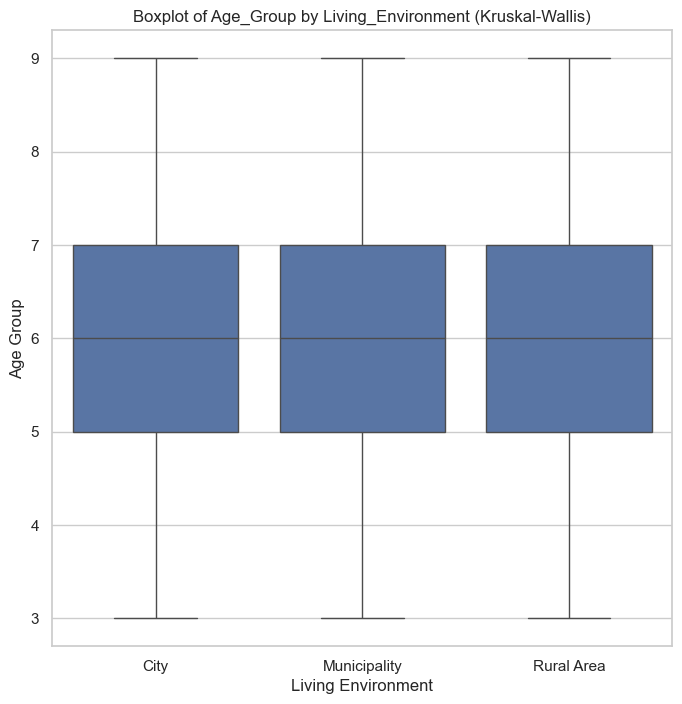

In [1282]:
# Kruskal-Wallis test between Age_Group and Living_Environment
grouped = [final_df[final_df['Living_Environment'] == group]['Age_Group'].dropna() for group in final_df['Living_Environment'].unique()]
h_stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test between Age_Group and Living_Environment: H-stat={h_stat:.2f}, p-value={p_value:.2f}")

if p_value < 0.05:
    print("There is a significant difference between Age Groups across Living Environments.")
else:
    print("There is no significant difference between Age Groups across Living Environments.")

# Visualize the Kruskal-Wallis groups with a boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(x='Living_Environment', y='Age_Group', data=final_df)
plt.title('Boxplot of Age_Group by Living_Environment (Kruskal-Wallis)')
plt.xlabel('Living Environment')
plt.ylabel('Age Group')
plt.show()